# Premier League Analysis by Andrew Chulik

- ### This report aims to analyze the English Football dataset to understand the factors influencing teams' performance in home and away games over 21 seasons. 

Specifically, we'll focus on the following descriptive measures common to football performance:
<li> Win/Loss Ratio </li>
<li> Goals Scored </li>
<li> Team Rivalries </li>
<li> Tracking penalties by referee </li>
<li> Corner Kick Advantages </li>
<li> Winning probability with red cards by Season </li>


- ### The analysis aims to provide actionable insights for optimizing game plans and understanding the impact of environmental and game-time events on team performance. 

- ### This study is crucial for strategic planning in competitive sports and will be for stakeholders to review in preparation for the next season.

In [1]:
#FTHG	Full Time Home Team Goals
#FTAG	Full Time Away Team Goals
#FTR	Full Time Result (H=Home Win, D=Draw, A=Away Win)
#HTHG	Half Time Home Team Goals
#HTAG	Half Time Away Team Goals
#HTR	Half Time Result (H=Home Win, D=Draw, A=Away Win)
#HS	Home Team Shots
#AS	Away Team Shots
#HST	Home Team Shots on Target
#AST	Away Team Shots on Target
#HC	Home Team Corners
#AC	Away Team Corners
#HF	Home Team Fouls Committed
#AF	Away Team Fouls Committed
#HY	Home Team Yellow Cards
#AY	Away Team Yellow Cards
#HR	Home Team Red Cards
#AR	Away Team Red Cards

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

football_data = pd.read_csv('/Users/andrew/Library/CloudStorage/OneDrive-AndrewChulik/Capstone Project 2/English_Football_Cleaned_Data_Andrew_Chulik.csv')

## Overview of Home and Away Win Percentage With Emphasis on Top Six Teams

In [2]:
# Counting wins at home
home_wins = football_data[football_data['FTR'] == 'H'].groupby('HomeTeam').size()

# Counting wins away
away_wins = football_data[football_data['FTR'] == 'A'].groupby('AwayTeam').size()

# Counting total home and away games
total_home_games = football_data.groupby('HomeTeam').size()
total_away_games = football_data.groupby('AwayTeam').size()

# Calculating win rates
home_win_rate = home_wins / total_home_games
away_win_rate = away_wins / total_away_games

# Total wins and total games for each team
total_wins = home_wins.add(away_wins, fill_value=0)
total_games = total_home_games.add(total_away_games, fill_value=0)

# Calculating overall win rate
total_win_rate = total_wins / total_games

# Combine the win rates
comparison = pd.DataFrame({'Home Win Rate': home_win_rate, 'Away Win Rate': away_win_rate, 'Total Win Rate': total_win_rate})

# Sorting by total win rate in descending order
sorted_comparison = comparison.sort_values(by='Total Win Rate', ascending=False)

sorted_comparison

,Home Win Rate,Away Win Rate,Total Win Rate
Man United,0.691566,0.526570,0.609168
Chelsea,0.658596,0.522892,0.590580
Arsenal,0.669880,0.452785,0.561594
Liverpool,0.637681,0.467470,0.552473
Man City,0.627848,0.439394,0.533502
Tottenham,0.584541,0.354217,0.469240
Leeds,0.396396,0.378378,0.387387
Everton,0.495169,0.272947,0.384058
Ipswich,0.447368,0.315789,0.381579
Leicester,0.429268,0.289216,0.359413


### 1. Manchester United
- **Home Win Rate:** 69.16%
- **Away Win Rate:** 52.66%
- **Total Win Rate:** 60.92%

### 2. Chelsea
- **Home Win Rate:** 65.86%
- **Away Win Rate:** 52.29%
- **Total Win Rate:** 59.06%

### 3. Arsenal
- **Home Win Rate:** 66.99%
- **Away Win Rate:** 45.28%
- **Total Win Rate:** 56.16%

### 4. Liverpool
- **Home Win Rate:** 63.77%
- **Away Win Rate:** 46.75%
- **Total Win Rate:** 55.25%

### 5. Manchester City
- **Home Win Rate:** 62.78%
- **Away Win Rate:** 43.94%
- **Total Win Rate:** 53.35%

### 6. Tottenham
- **Home Win Rate:** 58.45%
- **Away Win Rate:** 35.42%
- **Total Win Rate:** 46.92%

### Win Rate Difference
- Manchester United: 16.50%
- Chelsea: 13.57%
- Arsenal: 21.71%
- Liverpool: 17.02%
- Manchester City: 18.84%
- Tottenham: 23.03%

### Key Takeaways
- All teams show a higher win rate at home, indicating the importance of home ground advantage.

- Manchester United and Chelsea are more consistent in their away performances with a win rate over 50%.

- Tottenham is the only team with a away win rate under 40% and possesses the highest Win Rate Difference.

- The average Win Rate Difference for these 6 teams is approximately 18.45%

# 1. Game Proformance

## I. Comparative Visualizations For Top Six English Football Teams

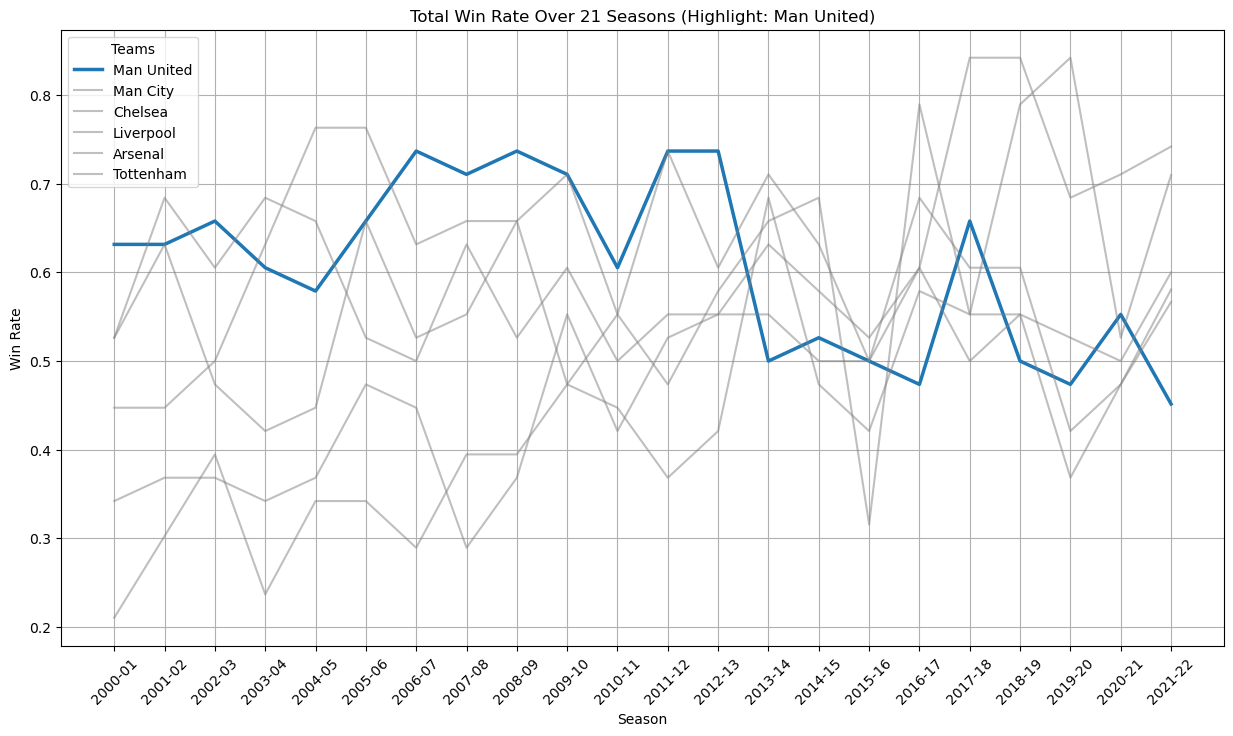

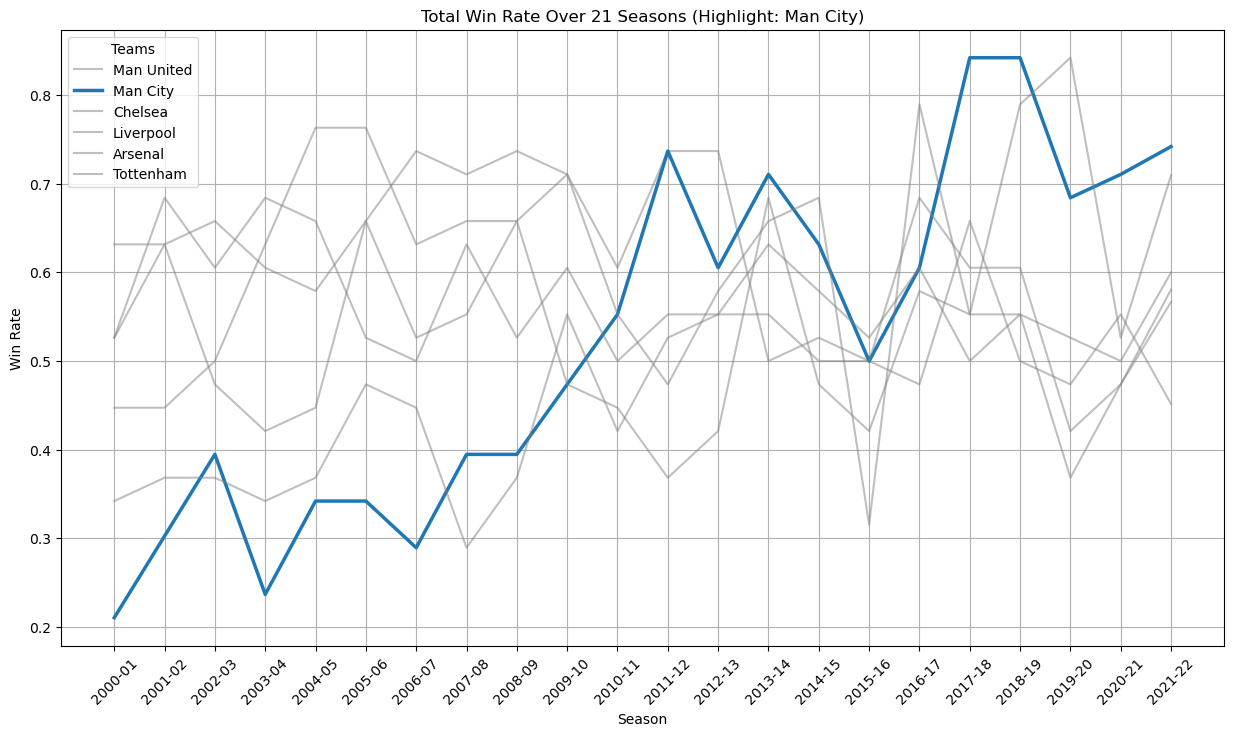

In [3]:
# Sorted comparison dataframe
sorted_comparison = pd.DataFrame({
    'Team': ['Man United', 'Man City', 'Chelsea', 'Liverpool', 'Arsenal', 'Tottenham'],
    'WinRate': [0.6, 0.58, 0.57, 0.55, 0.52, 0.50]
}).set_index('Team')

# Identifying the top 6 teams based on their latest total win rate
top_teams = sorted_comparison.head(6).index.tolist()

# Filtering the dataset for these teams
is_top_team = football_data['HomeTeam'].isin(top_teams) | football_data['AwayTeam'].isin(top_teams)
top_teams_data = football_data[is_top_team]

# Calculating win rates for each season for each team
season_win_rates_df = pd.DataFrame()

for team in top_teams:
    # Filter data for the specific team
    is_team_playing = (top_teams_data['HomeTeam'] == team) | (top_teams_data['AwayTeam'] == team)
    team_data = top_teams_data[is_team_playing]
    
    # Determine wins
    team_wins = (team_data['HomeTeam'] == team) & (team_data['FTR'] == 'H') | (team_data['AwayTeam'] == team) & (team_data['FTR'] == 'A')
    
    # Calculate and store win rates
    win_rates = team_wins.groupby(team_data['Season']).mean()
    season_win_rates_df[team] = win_rates

# Function to highlight a specific team in the plot
def highlight_team_plot(highlighted_team):
    plt.figure(figsize=(15, 8))
    for team in top_teams:
        if team == highlighted_team:
            sns.lineplot(data=season_win_rates_df[team], label=team, linewidth=2.5)
        else:
            sns.lineplot(data=season_win_rates_df[team], label=team, color='grey', alpha=0.5)
    plt.title(f'Total Win Rate Over 21 Seasons (Highlight: {highlighted_team})')
    plt.xlabel('Season')
    plt.ylabel('Win Rate')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title='Teams')
    plt.show()

# First plot highlighting Manchester United
highlight_team_plot('Man United')

# Second plot highlighting Manchester City
highlight_team_plot('Man City')

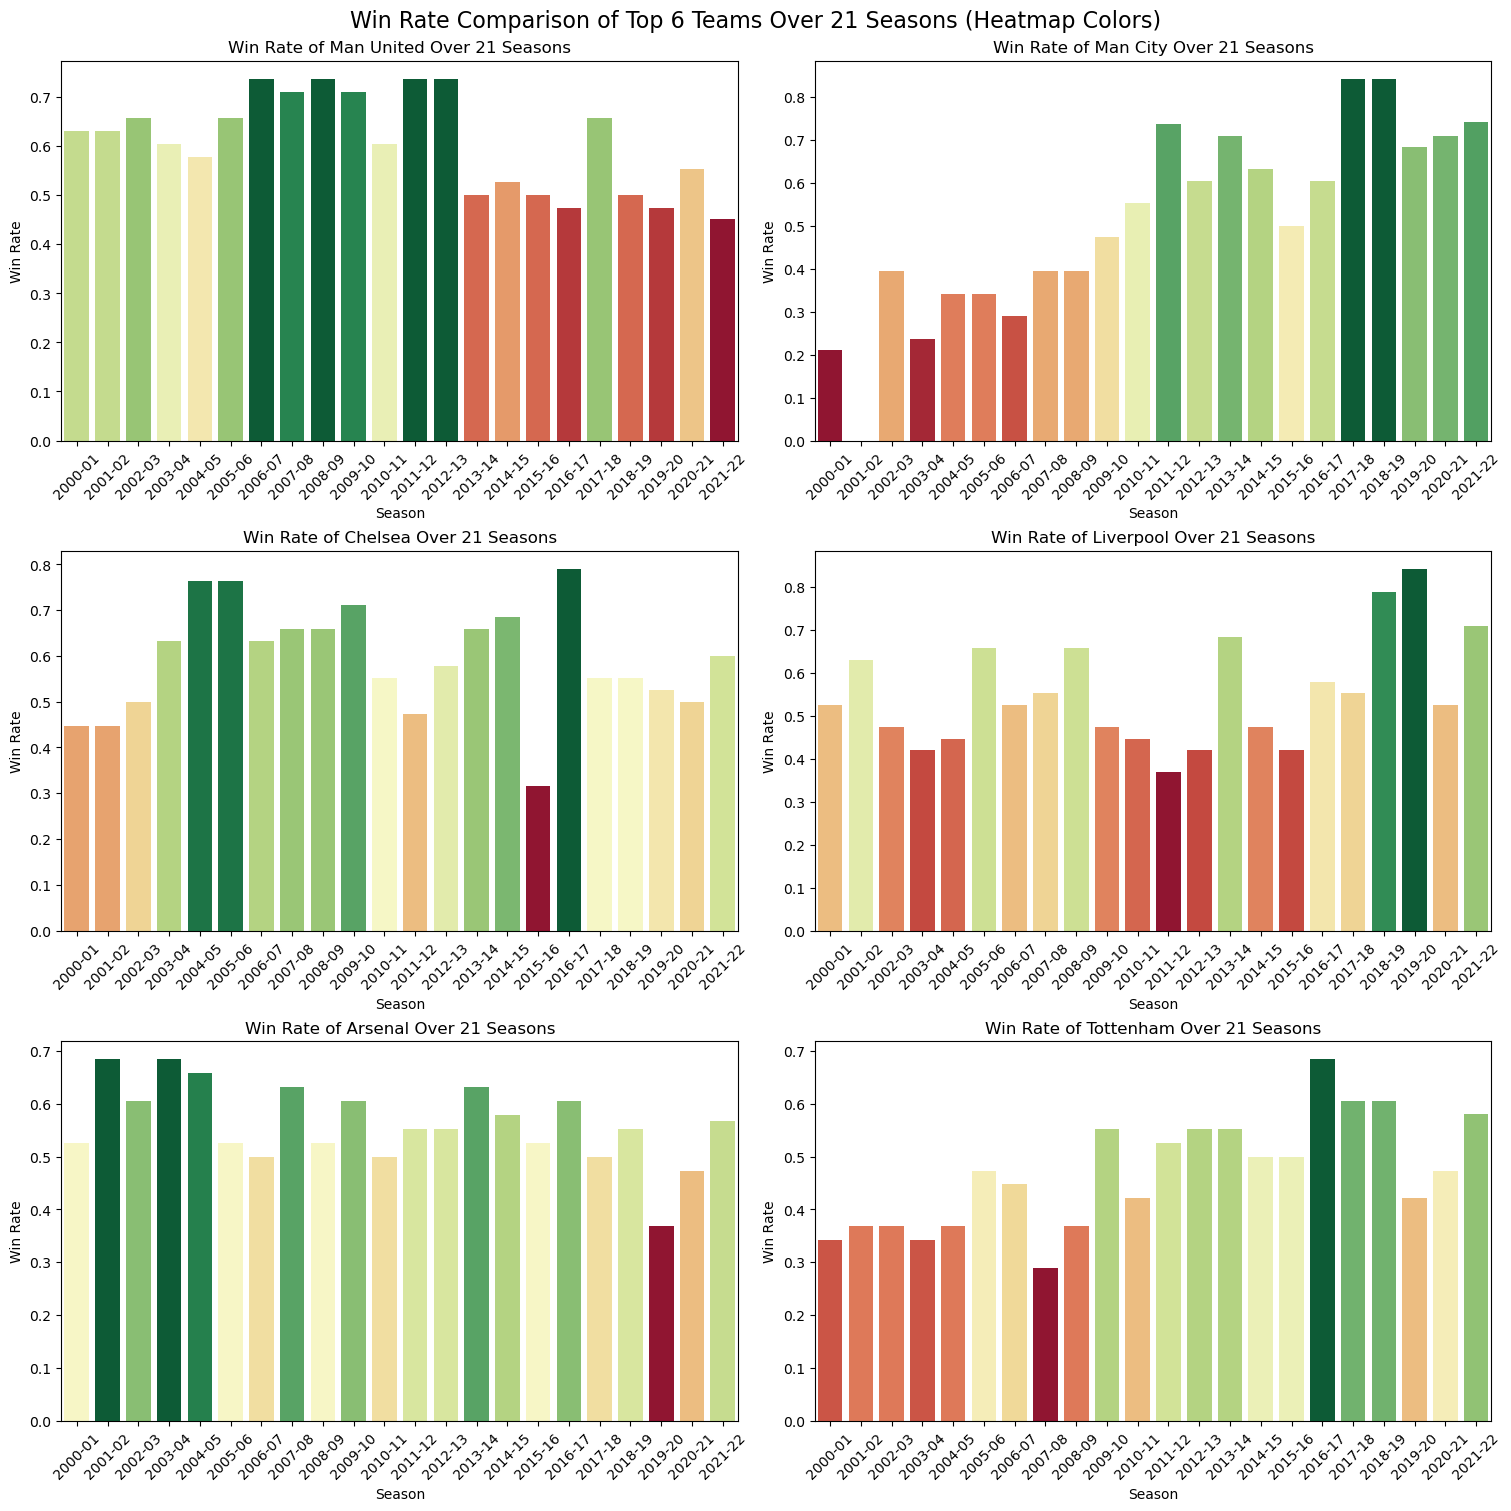

In [4]:
def heatmap_colors(values):
    normalized = (values - values.min()) / (values.max() - values.min())
    return plt.cm.RdYlGn(normalized)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), constrained_layout=True)

for i, team in enumerate(top_teams):
    colors = heatmap_colors(season_win_rates_df[team])
    sns.barplot(x=season_win_rates_df.index, y=season_win_rates_df[team], ax=axes.flat[i], palette=colors)
    axes.flat[i].set_title(f'Win Rate of {team} Over 21 Seasons')
    axes.flat[i].set_xlabel('Season')
    axes.flat[i].set_ylabel('Win Rate')
    axes.flat[i].tick_params(axis='x', rotation=45)

plt.suptitle('Win Rate Comparison of Top 6 Teams Over 21 Seasons (Heatmap Colors)', fontsize=16)
plt.show()

## II. Offensive Strengths & Weaknesses Across Top Six Teams

In [5]:
# Filtering data for the specific team
def calculate_performance(team_name):
    team_data = football_data[(football_data['HomeTeam'] == team_name) | (football_data['AwayTeam'] == team_name)]

    # Calculating averages
    home_goals_avg = team_data.loc[team_data['HomeTeam'] == team_name, 'FTHG'].mean()
    away_goals_avg = team_data.loc[team_data['AwayTeam'] == team_name, 'FTAG'].mean()
    home_shots_avg = team_data.loc[team_data['HomeTeam'] == team_name, 'HST'].mean()
    away_shots_avg = team_data.loc[team_data['AwayTeam'] == team_name, 'AST'].mean()

    return {
        'Home Performance': {'Average Goals': home_goals_avg, 'Average Shots on Target': home_shots_avg},
        'Away Performance': {'Average Goals': away_goals_avg, 'Average Shots on Target': away_shots_avg}
    }

teams_of_interest = ['Man United', 'Chelsea', 'Arsenal', 'Liverpool', 'Man City', 'Tottenham']

# Displaying performance for each team
for team in teams_of_interest:
    print(f"Performance for {team}:")
    performance = calculate_performance(team)
    for venue, stats in performance.items():
        print(f"{venue}:")
        for metric, value in stats.items():
            print(f"  {metric}: {value:.2f}" if pd.notna(value) else f"  {metric}: Data Not Available")
    print("\n")

Performance for Man United:
Home Performance:
  Average Goals: 2.09
  Average Shots on Target: 7.90
Away Performance:
  Average Goals: 1.66
  Average Shots on Target: 6.16


Performance for Chelsea:
Home Performance:
  Average Goals: 2.09
  Average Shots on Target: 7.60
Away Performance:
  Average Goals: 1.60
  Average Shots on Target: 6.11


Performance for Arsenal:
Home Performance:
  Average Goals: 2.13
  Average Shots on Target: 7.76
Away Performance:
  Average Goals: 1.61
  Average Shots on Target: 5.84


Performance for Liverpool:
Home Performance:
  Average Goals: 2.02
  Average Shots on Target: 7.75
Away Performance:
  Average Goals: 1.60
  Average Shots on Target: 6.17


Performance for Man City:
Home Performance:
  Average Goals: 2.10
  Average Shots on Target: 7.23
Away Performance:
  Average Goals: 1.57
  Average Shots on Target: 5.89


Performance for Tottenham:
Home Performance:
  Average Goals: 1.81
  Average Shots on Target: 7.33
Away Performance:
  Average Goals: 1.35


### Manchester United
- **Shots on Target Difference:** 1.74
- **Goal Difference:** 0.43

### Chelsea
- **Shots on Target Difference:** 1.49
- **Goal Difference:** 0.49

### Arsenal
- **Shots on Target Difference:** 1.92
- **Goal Difference:** 0.52

### Liverpool
- **Shots on Target Difference:** 1.58
- **Goal Difference:** 0.42

### Manchester City
- **Shots on Target Difference:** 1.34
- **Goal Difference:** 0.53

### Tottenham
- **Shots on Target Difference:** 1.90
- **Goal Difference:** 0.46

## Average Difference
- **Average Shots on Target Difference:** 1.66
- **Average Goal Difference:** 0.47

## III. Home & Away Goal Efficiency Rankings

In [6]:
# Function to calculate goal efficiency
def calculate_efficiency(team_name):
    team_data = football_data[(football_data['HomeTeam'] == team_name) | (football_data['AwayTeam'] == team_name)]
    home_games = team_data[team_data['HomeTeam'] == team_name]
    away_games = team_data[team_data['AwayTeam'] == team_name]
    
    # Calculate home and away goal efficiencies
    home_efficiency = home_games['FTHG'].sum() / home_games['HST'].sum() if home_games['HST'].sum() > 0 else 0
    away_efficiency = away_games['FTAG'].sum() / away_games['AST'].sum() if away_games['AST'].sum() > 0 else 0
    
    return {'Home Efficiency': home_efficiency, 'Away Efficiency': away_efficiency}

# Calculate goal efficiency for each team
team_efficiency_data = {team: calculate_efficiency(team) for team in teams_of_interest}

# Print the goal efficiency for each team
for team, efficiency in team_efficiency_data.items():
    print(f"{team} - Home Efficiency: {efficiency['Home Efficiency']:.3f}, Away Efficiency: {efficiency['Away Efficiency']:.3f}")

Man United - Home Efficiency: 0.264, Away Efficiency: 0.270
Chelsea - Home Efficiency: 0.275, Away Efficiency: 0.261
Arsenal - Home Efficiency: 0.274, Away Efficiency: 0.275
Liverpool - Home Efficiency: 0.260, Away Efficiency: 0.260
Man City - Home Efficiency: 0.290, Away Efficiency: 0.267
Tottenham - Home Efficiency: 0.248, Away Efficiency: 0.248


### Manchester United
- **Home Conversion Rate:** 26.46%
- **Away Conversion Rate:** 26.95%

### Chelsea
- **Home Conversion Rate:** 27.50%
- **Away Conversion Rate:** 26.19%

### Arsenal
- **Home Conversion Rate:** 27.45%
- **Away Conversion Rate:** 27.57%

### Liverpool
- **Home Conversion Rate:** 26.06%
- **Away Conversion Rate:** 25.93%

### Manchester City
- **Home Conversion Rate:** 29.05%
- **Away Conversion Rate:** 26.66%

### Tottenham
- **Home Conversion Rate:** 24.69%
- **Away Conversion Rate:** 24.86%

## Average Conversion Rate

- **Average Home Conversion Rate:** 26.87%
- **Average Away Conversion Rate:** 26.36%

# 2. Team Rivalry

## I. Analysis of Premier League Big Six Clashes

In [7]:
# List of the six teams
teams = ["Man United", "Chelsea", "Arsenal", "Liverpool", "Man City", "Tottenham"]

# Filter the dataset for matches where these teams played against each other
filtered_data = football_data[(football_data['HomeTeam'].isin(teams)) & (football_data['AwayTeam'].isin(teams))]

# Initialize dictionaries to store wins for home and away games
home_wins = {team: 0 for team in teams}
away_wins = {team: 0 for team in teams}

# Initialize dictionaries to store the team they beat the most and the team that beat them the most
team_beat_most = {team: {} for team in teams}
team_beaten_by_most = {team: {} for team in teams}

# Analyzing the data
for index, row in filtered_data.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    result = row['FTR']

    # Update home and away wins
    if result == 'H':
        home_wins[home_team] += 1
        # Update the team they beat
        team_beat_most[home_team][away_team] = team_beat_most[home_team].get(away_team, 0) + 1
        # Update the team that beat them
        team_beaten_by_most[away_team][home_team] = team_beaten_by_most[away_team].get(home_team, 0) + 1
    elif result == 'A':
        away_wins[away_team] += 1
        # Update the team they beat
        team_beat_most[away_team][home_team] = team_beat_most[away_team].get(home_team, 0) + 1
        # Update the team that beat them
        team_beaten_by_most[home_team][away_team] = team_beaten_by_most[home_team].get(away_team, 0) + 1

# Function to find the team they beat the most and the team that beat them the most
def find_most(data_dict):
    most_dict = {}
    for team, opponents in data_dict.items():
        if opponents:
            most_team = max(opponents, key=opponents.get)
            most_dict[team] = (most_team, opponents[most_team])
        else:
            most_dict[team] = (None, 0)
    return most_dict

# Apply the function
most_beaten_teams = find_most(team_beat_most)
most_beating_teams = find_most(team_beaten_by_most)

# Combine the results
analysis_results = {
    "Home Wins": home_wins,
    "Away Wins": away_wins,
    "Most Beaten Team": most_beaten_teams,
    "Most Beating Team": most_beating_teams
}

analysis_results

{'Home Wins': {'Man United': 57,
  'Chelsea': 56,
  'Arsenal': 50,
  'Liverpool': 54,
  'Man City': 47,
  'Tottenham': 39},
 'Away Wins': {'Man United': 37,
  'Chelsea': 38,
  'Arsenal': 23,
  'Liverpool': 31,
  'Man City': 27,
  'Tottenham': 16},
 'Most Beaten Team': {'Man United': ('Tottenham', 27),
  'Chelsea': ('Tottenham', 24),
  'Arsenal': ('Tottenham', 18),
  'Liverpool': ('Tottenham', 22),
  'Man City': ('Man United', 17),
  'Tottenham': ('Man City', 21)},
 'Most Beating Team': {'Man United': ('Man City', 17),
  'Chelsea': ('Liverpool', 16),
  'Arsenal': ('Man United', 18),
  'Liverpool': ('Man United', 20),
  'Man City': ('Chelsea', 23),
  'Tottenham': ('Man United', 27)}}

### Methodology

- This analysis focuses on the performance of Manchester United, Chelsea, Arsenal, Liverpool, Manchester City, and Tottenham in their head-to-head Premier League matches. We'll explore home and away wins, the teams each club has beaten most frequently, and the teams that have posed the greatest challenge.

### Home Wins

| Team        | Home Wins |
| ----------- | --------- |
| Man United  | 57        |
| Chelsea     | 56        |
| Arsenal     | 50        |
| Liverpool   | 54        |
| Man City    | 47        |
| Tottenham   | 39        |

### Away Wins

| Team        | Away Wins |
| ----------- | --------- |
| Man United  | 37        |
| Chelsea     | 38        |
| Arsenal     | 23        |
| Liverpool   | 31        |
| Man City    | 27        |
| Tottenham   | 16        |

### Teams Most Frequently Beaten

| Team        | Most Beaten Team | Times Beaten |
| ----------- | ---------------- | ------------ |
| Man United  | Tottenham        | 27           |
| Chelsea     | Tottenham        | 24           |
| Arsenal     | Tottenham        | 18           |
| Liverpool   | Tottenham        | 22           |
| Man City    | Man United       | 17           |
| Tottenham   | Man City         | 21           |

### Teams Most Frequently Lost To

| Team        | Most Beaten By   | Times Beaten |
| ----------- | ---------------- | ------------ |
| Man United  | Man City         | 17           |
| Chelsea     | Liverpool        | 16           |
| Arsenal     | Man United       | 18           |
| Liverpool   | Man United       | 20           |
| Man City    | Chelsea          | 23           |
| Tottenham   | Man United       | 27           |

# 3. Referee

## I. Which referee handed out the most red & yellow cards for games between the top 6 teams in the EPL

In [8]:
specified_teams = ['Man United', 'Chelsea', 'Arsenal', 'Liverpool', 'Man City', 'Tottenham']

for team in specified_teams:
    team_data = football_data[(football_data['HomeTeam'] == team) | (football_data['AwayTeam'] == team)].copy()
    team_data['TeamYellowCards'] = team_data.apply(lambda row: row['HY'] if row['HomeTeam'] == team else row['AY'], axis=1)
    team_data['TeamRedCards'] = team_data.apply(lambda row: row['HR'] if row['HomeTeam'] == team else row['AR'], axis=1)

    yellow_card_referee = team_data.groupby('Referee')['TeamYellowCards'].sum().idxmax()
    yellow_card_count = team_data.groupby('Referee')['TeamYellowCards'].sum().max()
    red_card_referee = team_data.groupby('Referee')['TeamRedCards'].sum().idxmax()
    red_card_count = team_data.groupby('Referee')['TeamRedCards'].sum().max()

    print(f"{team} - Yellow Cards: Referee {yellow_card_referee} ({yellow_card_count} cards), "
          f"Red Cards: Referee {red_card_referee} ({red_card_count} cards)")

Man United - Yellow Cards: Referee M Dean (128.0 cards), Red Cards: Referee M Clattenburg (6.0 cards)
Chelsea - Yellow Cards: Referee M Dean (128.0 cards), Red Cards: Referee M Dean (9.0 cards)
Arsenal - Yellow Cards: Referee M Dean (119.0 cards), Red Cards: Referee M Atkinson (7.0 cards)
Liverpool - Yellow Cards: Referee M Atkinson (81.0 cards), Red Cards: Referee M Atkinson (5.0 cards)
Man City - Yellow Cards: Referee M Dean (121.0 cards), Red Cards: Referee M Dean (10.0 cards)
Tottenham - Yellow Cards: Referee M Dean (113.0 cards), Red Cards: Referee M Dean (5.0 cards)


### Analysis
 
- Referees M Dean and M Atkinson have shown a pattern of issuing more cards to the specified teams (Manchester United, Chelsea, Arsenal, Liverpool, Manchester City, and Tottenham), suggesting stricter enforcement of rules or lower tolerance for aggressive play.

### Conclusions

- Awareness of the referee's history and tendencies is crucial. Teams should understand the types of fouls more likely to be penalized and the general strictness of the referee.

- Teams should analyze the types of fouls givven by each of these refs that lead to cards and train specifically to avoid these situations.

## II. Which Referees Are Above The Trend Line

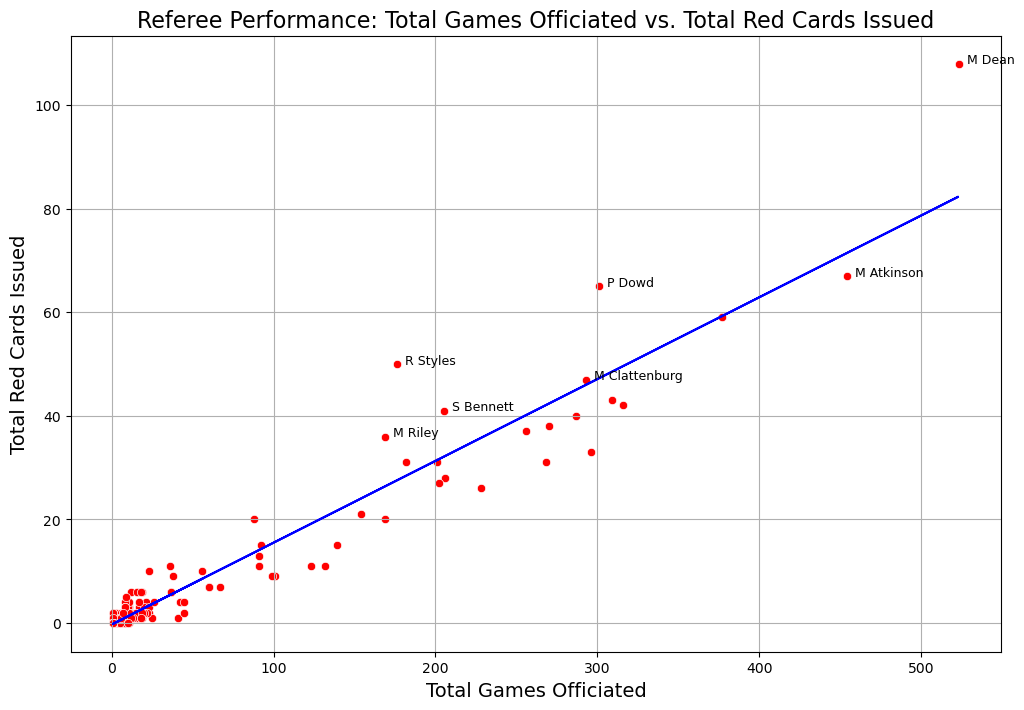

In [9]:
def calculate_referee_stats(df):
    total_games = df['Referee'].value_counts()
    total_red_cards = df.groupby('Referee')[['HR', 'AR']].sum().sum(axis=1)
    return pd.DataFrame({'Total Games': total_games, 'Total Red Cards': total_red_cards})

def plot_referee_performance(df, refs_to_annotate=[]):
    # Calculating the trend line
    slope, intercept = np.polyfit(df['Total Games'], df['Total Red Cards'], 1)
    threshold = intercept + slope * df['Total Games'].max() * 0.1

    # Creating the scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='Total Games', y='Total Red Cards', color='red')
    plt.plot(df['Total Games'], slope * df['Total Games'] + intercept, color='blue')
    plt.xlabel('Total Games Officiated', fontsize=14)
    plt.ylabel('Total Red Cards Issued', fontsize=14)
    plt.title('Referee Performance: Total Games Officiated vs. Total Red Cards Issued', fontsize=16)
    plt.grid(True)

    # Annotating specific referees
    for ref, row in df.iterrows():
        if row['Total Red Cards'] > slope * row['Total Games'] + threshold or ref in refs_to_annotate:
            plt.text(row['Total Games'] + 5, row['Total Red Cards'], ref, fontsize=9)

    # Show the plot
    plt.show()

# Using the functions with the football_data DataFrame
referee_stats = calculate_referee_stats(football_data)
plot_referee_performance(referee_stats, refs_to_annotate=['M Clattenburg', 'M Atkinson'])

# 4. Red Cards

## I. Red Cards Issued to Home vs Away Teams (2000-2021)

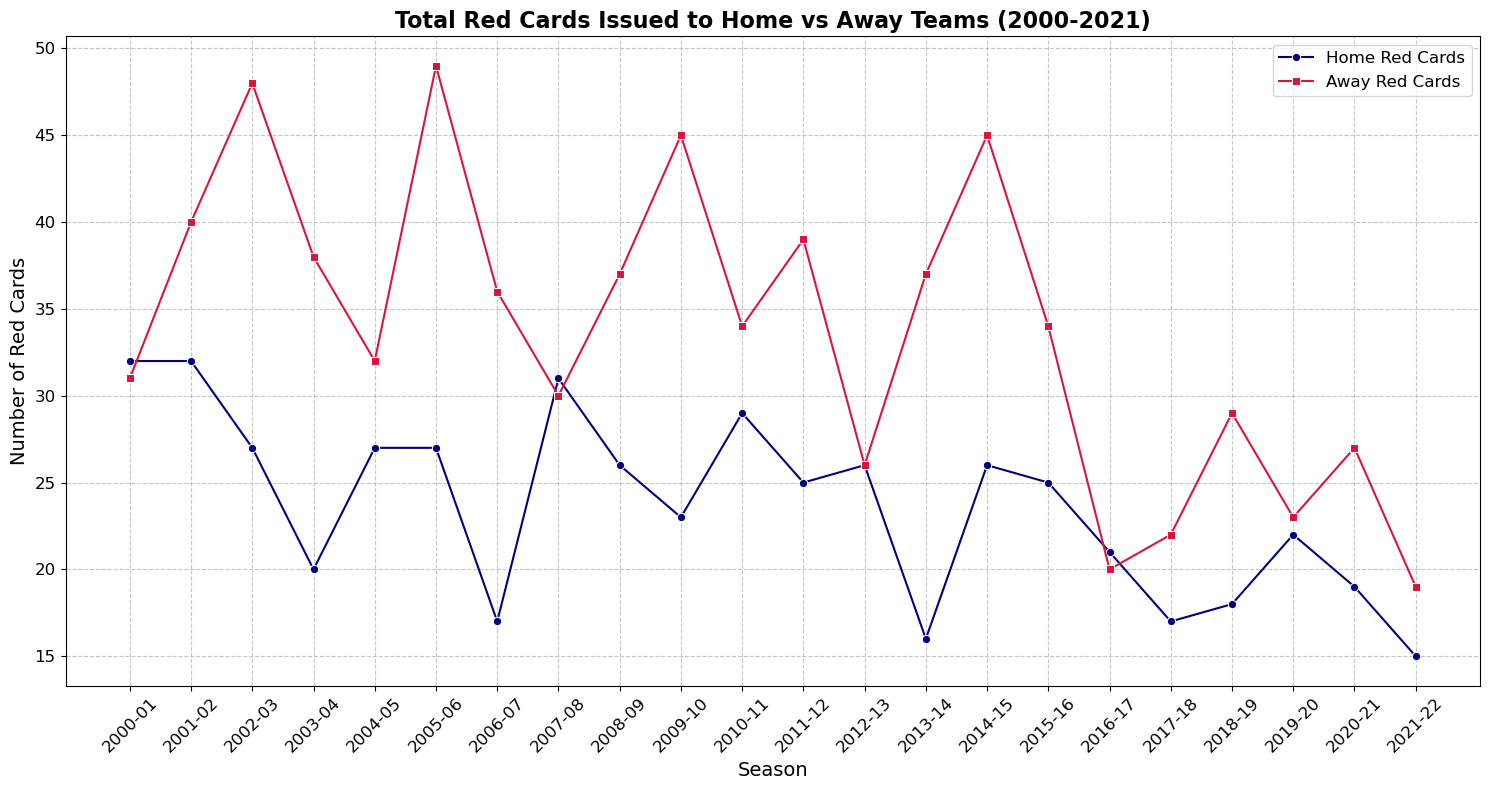

In [10]:
# Group the data by season and aggregate the red card data
red_cards_time_series = football_data.groupby('Season').agg({'HR': 'sum', 'AR': 'sum'})

# Creating the enhanced plot
plt.figure(figsize=(15, 8))

# Plotting with distinct colors and markers
sns.lineplot(data=red_cards_time_series, x=red_cards_time_series.index, y='HR', 
             label='Home Red Cards', color='navy', marker='o')
sns.lineplot(data=red_cards_time_series, x=red_cards_time_series.index, y='AR', 
             label='Away Red Cards', color='crimson', marker='s')

# Adding title, labels, and grid for better readability
plt.title('Total Red Cards Issued to Home vs Away Teams (2000-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Red Cards', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjusting layout for neatness
plt.tight_layout()

# Display the plot
plt.show()

### Analysis

- The plot shows fluctuations in the number of red cards issued over the years for both home and away teams, suggesting changes in playing styles, rule enforcement, or the evolution of the game.

- There is a notable difference in the number of red cards issued to home and away teams, with away teams often receiving more red cards. This trend could indicate a 'home advantage', where away teams are either more aggressive or penalized more strictly.

- Specific seasons exhibit spikes in red card issuance, possibly due to rule changes, an increase in aggressive play, or a cohort of stricter referees.

### Conclusions

- The trend of away teams receiving more red cards could reinforce the concept of 'home advantage', implying a need for away teams to focus on discipline and reducing aggressive plays.

- Teams and coaches might need to adjust their strategies, especially for away games, to account for potential stricter scrutiny.

- The visualization indicates a significant trend of away teams receiving more red cards than home teams, emphasizing the importance of strategic planning for teams and highlighting potential areas for improvement in referee training and game fairness.

## II. Relationship Between Total Fouls and Total Red Cards per Season

               TotalFouls  TotalRedCards
TotalFouls        1.00000        0.68249
TotalRedCards     0.68249        1.00000


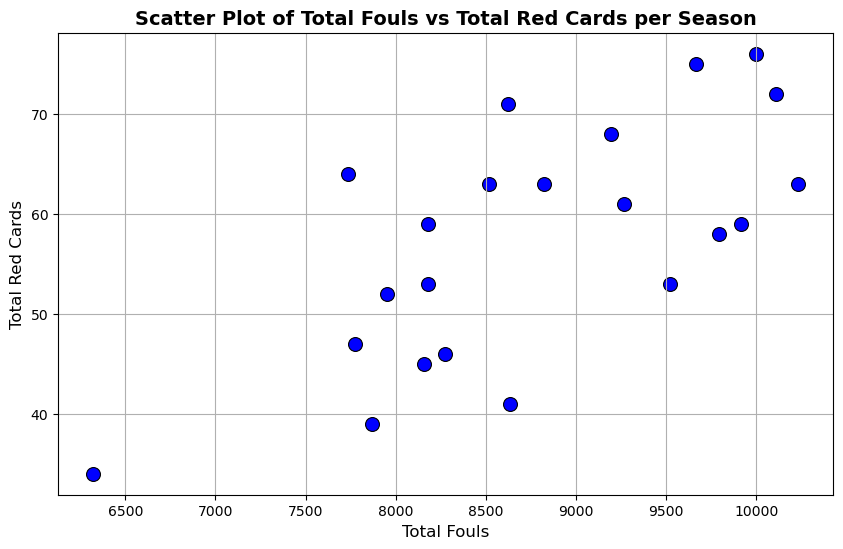

In [11]:
# Aggregating data for fouls and red cards per season
data_analysis = football_data.groupby('Season').agg({'HF': 'sum', 'AF': 'sum', 'HR': 'sum', 'AR': 'sum'})
data_analysis['TotalFouls'] = data_analysis['HF'] + data_analysis['AF']
data_analysis['TotalRedCards'] = data_analysis['HR'] + data_analysis['AR']

# Calculating the correlation
correlation = data_analysis[['TotalFouls', 'TotalRedCards']].corr()
print(correlation)

# Creating a scatter plot with bolder points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_analysis, x='TotalFouls', y='TotalRedCards', s=100, color='blue', edgecolor='black')  

# Adjust size with 's' and color
plt.title('Scatter Plot of Total Fouls vs Total Red Cards per Season', fontsize=14, fontweight='bold')
plt.xlabel('Total Fouls', fontsize=12)
plt.ylabel('Total Red Cards', fontsize=12)
plt.grid(True)
plt.show()

### Correlation Coefficient

- The correlation coefficient between total fouls and total red cards is approximately **0.68249**. This indicates a moderate to strong positive correlation, suggesting that as the number of fouls increases, the number of red cards tends to increase as well.

- The distribution of points suggests a trend where seasons with higher numbers of fouls also tend to have higher numbers of red cards.

- seasons with more aggressive play (as indicated by fouls) are likely to see more severe penalties (red cards). It highlights the importance of maintaining discipline in play to avoid penalties.

## III. Match Outcomes in Relation to Red Cards

In [12]:
# Filter matches where one team received one or more red cards and the other none
red_card_conditions = (
    ((football_data['HR'] >= 1) & (football_data['AR'] == 0)) | 
    ((football_data['AR'] >= 1) & (football_data['HR'] == 0))
)

matches_with_red_cards = football_data[red_card_conditions]

# Calculate the number of wins for the team with the red card
wins_with_red_card = matches_with_red_cards.apply(
    lambda row: (
        (row['FTR'] == 'H' and row['HR'] >= 1) or 
        (row['FTR'] == 'A' and row['AR'] >= 1)
    ), axis=1
).sum()

# Calculate the likelihood as a percentage
likelihood_percentage = (wins_with_red_card / len(matches_with_red_cards)) * 100
likelihood_percentage

17.358490566037734

### Methodology

- Scenarios where one team received one or more red cards while their opponents received none. The aim was to determine the likelihood of the team with the red card(s) winning the match under these circumstances.

### Analysis

- The analysis revealed that the likelihood of a team winning after receiving one or more red cards, with the opposing team receiving none, is approximately **17.36%**.

- This outcome suggests that it is relatively rare for teams at a numerical disadvantage due to red cards to win their matches.

### Conclusion

- The data indicates that receiving red cards significantly reduces a team's chances of winning, highlighting the importance of maintaining discipline and avoiding red-card offenses during matches.

## IV. Match Outcomes in Relation to Red Cards Across Differenct Decades

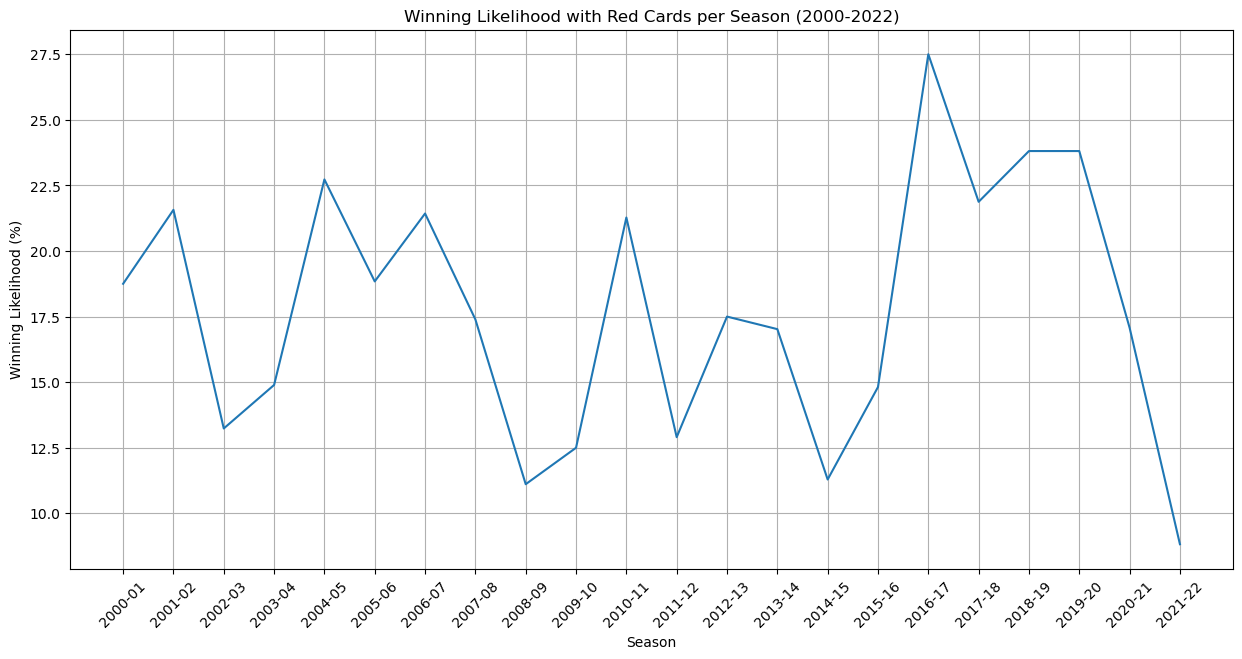

In [13]:
# Ensure the season data is in a proper format for grouping
football_data['Season'] = football_data['Season'].astype(str)

# Redefine the function to calculate win percentages, now without the date conversion error
def calculate_win_percentage_by_season(dataframe):
    grouped = dataframe.groupby('Season')
    win_percentages = {}

    for name, group in grouped:
        red_card_conditions = (
            ((group['HR'] >= 1) & (group['AR'] == 0)) | 
            ((group['AR'] >= 1) & (group['HR'] == 0))
        )
        matches_with_red_cards = group[red_card_conditions]
        wins_with_red_card = matches_with_red_cards.apply(
            lambda row: (
                (row['FTR'] == 'H' and row['HR'] >= 1) or 
                (row['FTR'] == 'A' and row['AR'] >= 1)
            ), axis=1
        ).sum()
        win_percentages[name] = (wins_with_red_card / len(matches_with_red_cards)) * 100 if len(matches_with_red_cards) > 0 else 0

    return win_percentages

# Calculate win percentages by season
win_percentages_by_season = calculate_win_percentage_by_season(football_data)

# Sorting the seasons for better visualization
seasons_sorted = sorted(win_percentages_by_season.keys())
win_percentages_sorted = [win_percentages_by_season[season] for season in seasons_sorted]

# Plotting
plt.figure(figsize=(15, 7))
sns.lineplot(x=seasons_sorted, y=win_percentages_sorted)
plt.title('Winning Likelihood with Red Cards per Season (2000-2022)')
plt.xlabel('Season')
plt.ylabel('Winning Likelihood (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [14]:
# Convert Season column to datetime format for easier filtering
football_data['Season'] = pd.to_datetime(football_data['Season'].apply(lambda x: x.split('-')[0]), format='%Y')

# Splitting the dataset into two parts based on the seasons
seasons_2000_2010 = football_data[(football_data['Season'] >= '2000') & (football_data['Season'] < '2010')]
seasons_2010_2022 = football_data[(football_data['Season'] >= '2010') & (football_data['Season'] < '2022')]

# Applying the same red card filter and calculation for both datasets
def calculate_win_percentage(dataframe):
    red_card_conditions = (
        ((dataframe['HR'] >= 1) & (dataframe['AR'] == 0)) | 
        ((dataframe['AR'] >= 1) & (dataframe['HR'] == 0))
    )
    matches_with_red_cards = dataframe[red_card_conditions]
    wins_with_red_card = matches_with_red_cards.apply(
        lambda row: (
            (row['FTR'] == 'H' and row['HR'] >= 1) or 
            (row['FTR'] == 'A' and row['AR'] >= 1)
        ), axis=1
    ).sum()
    return (wins_with_red_card / len(matches_with_red_cards)) * 100 if len(matches_with_red_cards) > 0 else 0

likelihood_2000_2010 = calculate_win_percentage(seasons_2000_2010)
likelihood_2010_2022 = calculate_win_percentage(seasons_2010_2022)

likelihood_2000_2010, likelihood_2010_2022

(17.02127659574468, 17.67955801104972)

### Methodology

- In this analysis, we investigated how the likelihood of a team winning a match when receiving one or more red cards (while the opposing team receives none) varied across different seasons. We divided our dataset into two distinct periods: Seasons 2000-01 to 2009-10 and Seasons 2010-11 to 2021-22.

- The dataset was divided based on the seasons, allowing for a comparative analysis across two different decades.

- We calculated the win percentage for teams receiving red cards under the specified conditions for each time period.

### Analysis

- **Seasons 2000-01 to 2009-10:** The likelihood of a team winning after receiving one or more red cards was approximately **17.02%**.

- **Seasons 2010-11 to 2021-22:** In this later period, the likelihood of such a team winning slightly increased to about **17.68%**.

- The findings indicate a marginal increase in the likelihood of teams overcoming the disadvantage of red cards in more recent seasons.

- This could suggest improvements in teams' ability to adapt to playing with fewer players, changes in tactical approaches, or even variations in the way games are officiated over time.

### Conclusion

- The analysis highlights the evolving nature of football, with teams showing a slightly better ability to cope with the challenges posed by red cards in recent years. This insight could be valuable for coaches, analysts, and teams in strategizing and preparing for such scenarios.

# 5. Corner Kicks

## I. Football Match Outcome Analysis Based on Corner Kicks

In [15]:
# Calculate the difference in corner kicks
football_data['CornerDiff'] = football_data['HC'] - football_data['AC']

# Identify matches where the home team had more than 5 corner kicks than the away team and won
home_advantage_wins = football_data[(football_data['CornerDiff'] > 5) & (football_data['FTR'] == 'H')]

# Identify matches where the away team had more than 5 corner kicks than the home team and won
away_advantage_wins = football_data[(football_data['CornerDiff'] < -5) & (football_data['FTR'] == 'A')]

# Combine the two scenarios
total_advantage_wins = pd.concat([home_advantage_wins, away_advantage_wins])

# Identify matches with a corner advantage greater than 5, regardless of which team has the advantage
matches_with_corner_advantage = football_data[football_data['CornerDiff'].abs() > 5]

# Calculate the win rate
win_rate = len(total_advantage_wins) / len(matches_with_corner_advantage) * 100

win_rate

44.56630109670987

In [16]:
# Filter matches where one team had more than 10 corner kicks than the other
matches_with_10_corner_advantage = football_data[abs(football_data['CornerDiff']) >= 10]

# Identify matches where the home team had more than 10 corner kicks than the away team and won
home_advantage_10_wins = football_data[(football_data['CornerDiff'] >= 10) & (football_data['FTR'] == 'H')]

# Identify matches where the away team had more than 10 corner kicks than the home team and won
away_advantage_10_wins = football_data[(football_data['CornerDiff'] <= -10) & (football_data['FTR'] == 'A')]

# Combine the two scenarios for 10 or more corner kick advantage
total_10_advantage_wins = pd.concat([home_advantage_10_wins, away_advantage_10_wins])

# Calculate the win rate for teams with 10 or more corner kick advantage
win_rate_10 = len(total_10_advantage_wins) / len(matches_with_10_corner_advantage) * 100 if len(matches_with_10_corner_advantage) > 0 else 0

win_rate_10

39.31203931203931

### Analysis of Teams with More than 5 Corner Kicks Advantage

- Matches were filtered to identify cases where one team had more than 5 corner kicks than the opposing team and won the game.

- **Results**: 
  - The likelihood of winning for the team with more than 5 corner kicks advantage is approximately **44.57%**.
  - This indicates that while having a significant corner kick advantage correlates with a better chance of winning, it is not a strong determinant of the match outcome.

### Analysis of Teams with 10 or More Corner Kicks Advantage

- Matches were filtered to identify cases where one team had 10 or more corner kicks than the opposing team and won the game.

- **Results**: 
  - The likelihood of winning for the team with 10 or more corner kicks advantage is approximately **39.31%**.
  - Interestingly, this suggests that a larger corner kick advantage does not necessarily increase the likelihood of winning, indicating a potential threshold beyond which additional corner kicks do not significantly impact the game's outcome.

### Conclusion

- The findings suggest that while corner kicks can be an indicator of a team's offensive strength, they do not strongly predict the outcome of a match on their own. Teams with a moderate advantage in corner kicks (more than 5) have a higher likelihood of winning than those with a very high advantage (10 or more). This could imply that factors other than just the number of corner kicks play a crucial role in determining the match result.

## II. Correlation Analysis Between Total Corner Kicks and Total Goals in a Season

In [17]:
# Aggregate total corner kicks per season for each team
total_corners_per_season = football_data.groupby('Season').agg({'HC': 'sum', 'AC': 'sum'})
total_corners_per_season['TotalCorners'] = total_corners_per_season['HC'] + total_corners_per_season['AC']

# Aggregate total goals per season
total_goals_per_season = football_data.groupby('Season').agg({'FTHG': 'sum', 'FTAG': 'sum'})
total_goals_per_season['TotalGoals'] = total_goals_per_season['FTHG'] + total_goals_per_season['FTAG']

# Combine the two datasets
seasonal_data = pd.concat([total_corners_per_season['TotalCorners'], total_goals_per_season['TotalGoals']], axis=1)

# Calculate the correlation
correlation = seasonal_data.corr()

correlation

,TotalCorners,TotalGoals
TotalCorners,1.000000,0.413362
TotalGoals,0.413362,1.000000


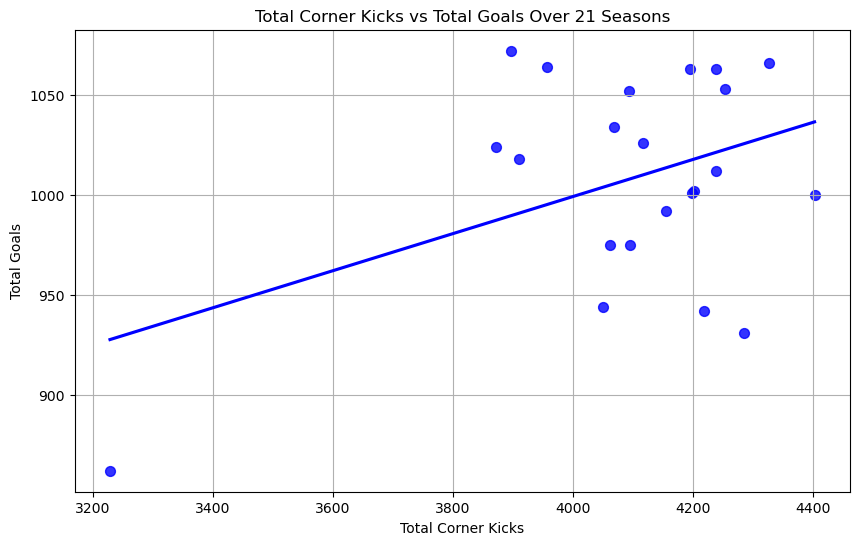

In [18]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='TotalCorners', y='TotalGoals', data=seasonal_data, color='blue', scatter_kws={'s':50}, ci=None)
plt.title('Total Corner Kicks vs Total Goals Over 21 Seasons')
plt.xlabel('Total Corner Kicks')
plt.ylabel('Total Goals')
plt.grid(True)

# Show the plot
plt.show()

### Methodology

- For each season, the total number of corner kicks and the total number of goals were aggregated.

- A correlation coefficient was calculated to quantify the relationship between these two variables.

### Findings

- The analysis revealed a correlation coefficient of **0.413** between total corner kicks and total goals per season.

- This coefficient indicates a moderate positive correlation. It suggests that seasons with a higher number of corner kicks tend to also see a higher number of goals scored.

# Key Takeaways

## Home Ground Advantage
- **Teams that play at home have a clear advantage** in terms of winning games, scoring more goals, and receiving fewer red cards. For instance, teams like Manchester United and Chelsea exhibit significantly higher win rates when playing at home.

## Referee Influence and Defensive Strategy
- **Awareness of the referee's presence is crucial** for teams to adapt their defensive strategies effectively. This is particularly important to avoid penalties and red cards, which can heavily influence the game's outcome.

## Corner Kicks and Goal Scoring
- **Corner kicks correlate with more goals scored** in a season. While this indicates an offensive advantage, it does not necessarily translate to winning more games when more corners are taken.

## Goal Efficiency
- **Efficiency in scoring goals does not change significantly between home and away games**.